In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)


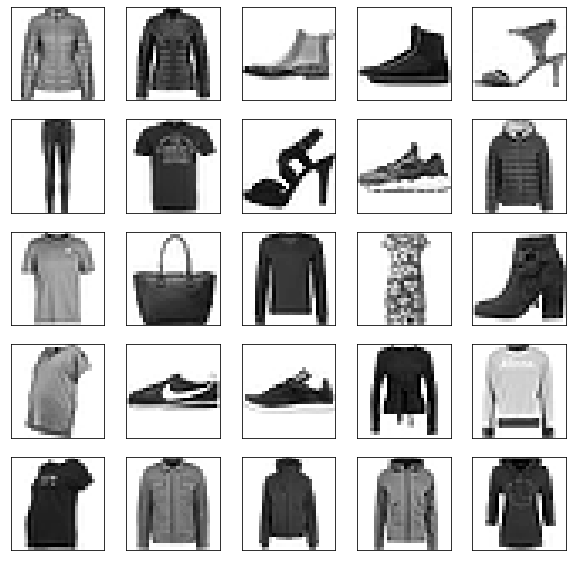

In [4]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [5]:
len(list(train_dataset))

60000

In [6]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
hist = model.fit(train_dataset, epochs=20, steps_per_epoch=math.ceil(60000/BATCH_SIZE))


Epoch 1/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3237 - accuracy: 0.8814
Epoch 2/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3021 - accuracy: 0.8884
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2864 - accuracy: 0.8944
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2740 - accuracy: 0.8975
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2533 - accuracy: 0.9051
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2569 - accuracy: 0.9040
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2456 - accuracy: 0.9072
Epoch 8/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2328 - accuracy: 0.9118
Epoch 9/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2234 - accuracy: 0.9159
Epoch 10/20
1875/1875 [==============================] - 26s 14m

In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 6s 18ms/step - loss: 0.3754 - accuracy: 0.8881
Accuracy on test dataset: 0.8881000280380249


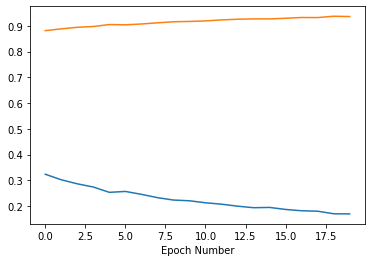

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

<AxesSubplot:>

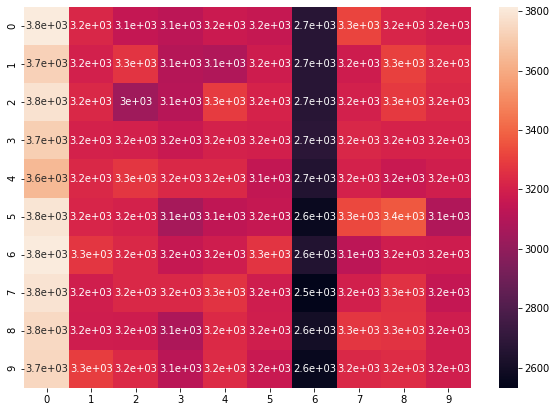

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

pred = model.predict(train_dataset.take(10000))
pred = tf.argmax(pred,axis=1)
true = tf.concat([y for x,y in train_dataset.take(10000)],axis=0)

cm=metrics.confusion_matrix(true,pred)

df_cm = pd.DataFrame(cm, index = [y for y in range(10)],
                  columns = [y for y in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
